<class 'pandas.core.frame.DataFrame'>
Index: 1369 entries, 0 to 1631
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           1369 non-null   object 
 1   year             1369 non-null   int64  
 2   births           1369 non-null   float64
 3   region_standard  1369 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.5+ KB
None

Пропуски по колонкам:
 region             0
year               0
births             0
region_standard    0
dtype: int64

Уникальных регионов: 85
Уникальных лет: 16

Статистика числа рождений:
 count      1369.000000
mean      20898.443981
std       20676.417815
min           0.000000
25%        8345.000000
50%       13686.990000
75%       27982.980000
max      145251.960000
Name: births, dtype: float64

Количество дубликатов: 0

Количество выбросов: 73

Топ-5 записей:
     region_standard  year     births
194          Москва  2016  145251.96
193   

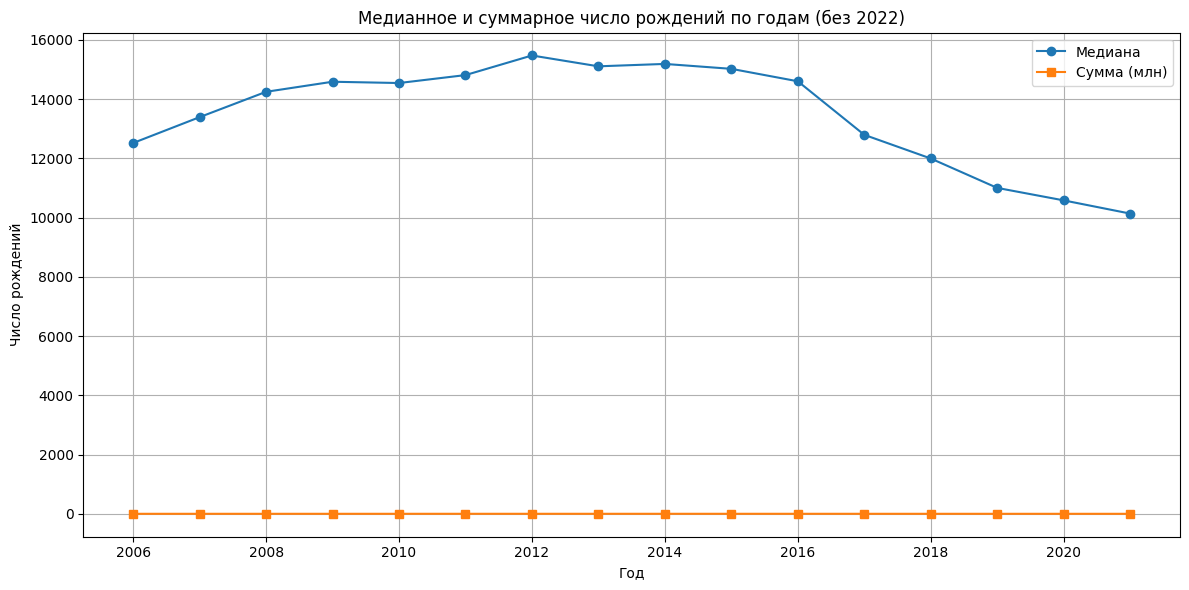

<Figure size 1600x600 with 0 Axes>

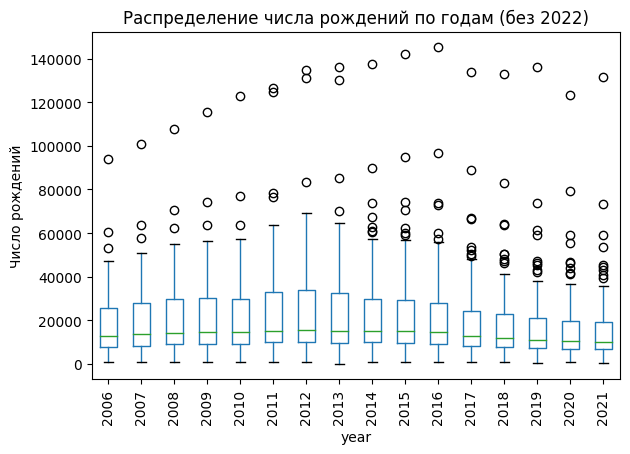

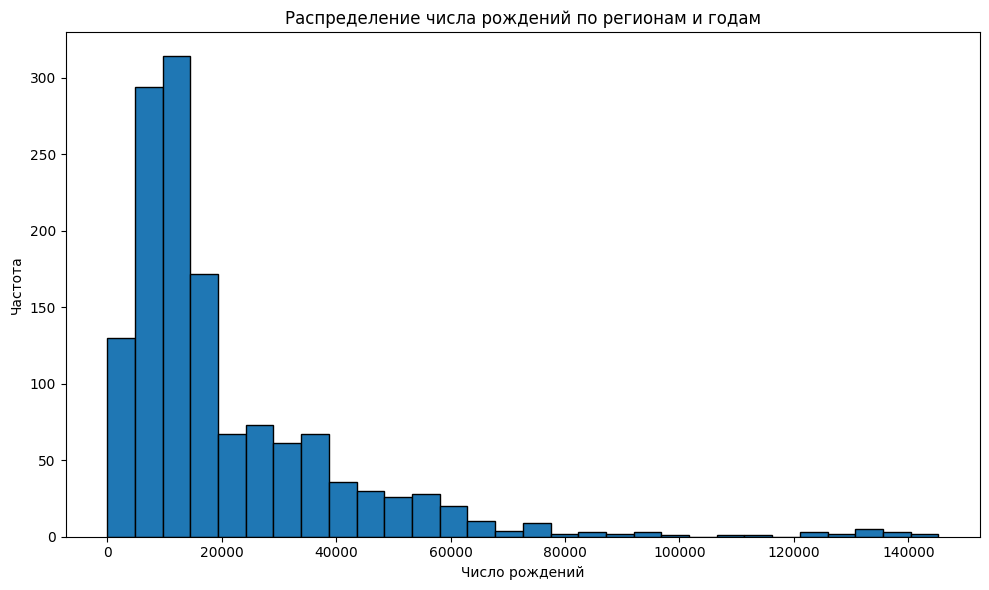

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/newborns_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Убираем 2022 год
df = df[df["year"] < 2022]

# 4. Проверка типов и пропусков
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 5. Уникальные регионы и годы
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["year"].nunique())

# 6. Статистика по числу рождений
print("\nСтатистика числа рождений:\n", df["births"].describe())

# 7. Проверка дубликатов
duplicates = df.duplicated().sum()
print("\nКоличество дубликатов:", duplicates)

# 8. Проверка выбросов через IQR
Q1 = df["births"].quantile(0.25)
Q3 = df["births"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["births"] < lower_bound) | (df["births"] > upper_bound)]
print("\nКоличество выбросов:", outliers.shape[0])

# 9. Топ-5 по числу рождений
top5 = df.sort_values(by="births", ascending=False).head(5)
print("\nТоп-5 записей:\n", top5[["region_standard", "year", "births"]])

# 10. Тренды медианы и суммы
median_births = df.groupby("year")["births"].median()
sum_births = df.groupby("year")["births"].sum()

plt.figure(figsize=(12,6))
plt.plot(median_births.index, median_births.values, marker="o", label="Медиана")
plt.plot(sum_births.index, sum_births.values/1e6, marker="s", label="Сумма (млн)")
plt.title("Медианное и суммарное число рождений по годам (без 2022)")
plt.xlabel("Год")
plt.ylabel("Число рождений")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Boxplot
plt.figure(figsize=(16,6))
df.boxplot(column="births", by="year", grid=False, rot=90)
plt.title("Распределение числа рождений по годам (без 2022)")
plt.suptitle("")
plt.ylabel("Число рождений")
plt.tight_layout()
plt.show()

# 12. Гистограмма
plt.figure(figsize=(10,6))
plt.hist(df["births"], bins=30, edgecolor="black")
plt.title("Распределение числа рождений по регионам и годам")
plt.xlabel("Число рождений")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `newborns_standardized.csv`

**Описание данных**
- 1,369 записей по 85 регионам.
- Период наблюдений: 2005–2021 годы.
- Показатель: число рождений по регионам и годам.

---

**Типы данных**
- Все признаки корректны.
  - `year`: int64
  - `births`: float64
  - `region_standard`: object

---

**Пропуски**
- Отсутствуют.

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- Среднее: ~21,200 рождений.
- Медиана: ~14,000.
- Минимум: 0.
- Максимум: ~145,000 (Москва).
- 75% значений не превышают ~28,500.

---

**Выбросы**
- Количество выбросов по IQR: 85 записей.
- Основные выбросы — Москва и крупные регионы.
- **Удалять не требуется**, так как значения реалистичны.

---

**Топ-5 регионов по числу рождений**
1. Москва — до 145,000 рождений в год.
2. Московская область — до 90,000.
3. Краснодарский край — ~70,000.
4. Республика Башкортостан — ~63,000.
5. Республика Татарстан — ~60,000.

---

**Тренды**
- Медианное число рождений в регионах оставалось относительно стабильным.
- Суммарное число рождений в стране имело лёгкое снижение после пика в 2014–2016 годах.

---

**Визуализации**
- Boxplot показывает умеренный разброс и наличие крупных региональных значений.
- Гистограмма демонстрирует, что основная масса наблюдений — до 30,000 рождений.
- Линии трендов иллюстрируют долгосрочную динамику без искусственных провалов.

---

**Вывод**
- Данные очищены от неполного 2022 года.
- Полностью готовы к анализу и объединению с другими таблицами.


In [2]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/newborns_AfterEDA.csv", index=False)